In [14]:
import jax 
import jax.numpy as jnp 
import jaxopt 
import matplotlib.pyplot as plt


In [40]:
def inverse_fn(f: callable, x: float, init_param=5.0): 
    loss_fn = lambda z: (f(z)-x)**2
    solver = jaxopt.GradientDescent(fun=loss_fn)
    return solver.run(init_param).params

def demand(p : float) -> float:
    return 10.0 - 2.*jnp.sqrt(p) 

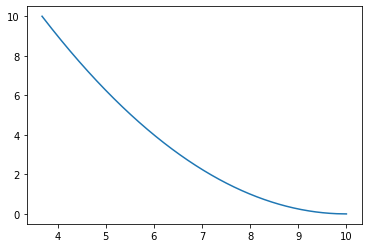

In [41]:
ps = jnp.linspace(0, 10, 1000)
qs = jax.vmap(demand)(ps)
plt.plot(qs, ps)
plt.show()

In [42]:
inverse_fn(demand, demand(2.))

DeviceArray(2.0000014, dtype=float32, weak_type=True)

In [44]:
def elasticity(Price: bool, f: callable, x: float):
    if Price:
        q, p = f(x), x
    else:
        q, p = x, inverse_fn(f, x)        
    return (p/q) * jax.grad(f)(p)

price = 3.0 
quantity = demand(3.0)
print(elasticity(True, demand, price))
print(elasticity(False, demand, quantity))





-0.26500577
-0.2649507


In [35]:
type(price)

float